Nil Mazouzi More 1674092 <br>
Jan Sans Domingo 1673276

In [48]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

<h2>EDA (exploratory data analysis)</h2>

Abans de començar a fer res, anem a veure com és la base de dades del problema.

La web del Kaggle ens  descriu els nostres atributs, i nosaltres els classifiquem segons aquesta descripció:
| Atribut                     | Tipus              | Descripció                                                                       |
|-----------------------------|--------------------|----------------------------------------------------------------------------------|
| class                       | Binari (Target)    | classes: edible=e, poisonous=p                                                  |
| cap-shape                   | Categòric          | cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s             |
| cap-surface                 | Categòric          | cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s                            |
| cap-color                   | Categòric          | cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y |
| bruises                     | Binari             | bruises: bruises=t, no=f                                                        |
| odor                        | Categòric          | odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s |
| gill-attachment             | Categòric          | gill-attachment: attached=a, descending=d, free=f, notched=n                    |
| gill-spacing                | Categòric          | gill-spacing: close=c, crowded=w, distant=d                                     |
| gill-size                   | Binari             | gill-size: broad=b, narrow=n                                                    |
| gill-color                  | Categòric          | gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y |
| stalk-shape                 | Binari             | stalk-shape: enlarging=e, tapering=t                                            |
| stalk-root                  | Categòric          | stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? |
| stalk-surface-above-ring    | Categòric          | stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s                 |
| stalk-surface-below-ring    | Categòric          | stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s                 |
| stalk-color-above-ring      | Categòric          | stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| stalk-color-below-ring      | Categòric          | stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| veil-type                   | Categòric          | veil-type: partial=p, universal=u                                               |
| veil-color                  | Categòric          | veil-color: brown=n, orange=o, white=w, yellow=y                                |
| ring-number                 | Categòric          | ring-number: none=n, one=o, two=t                                               |
| ring-type                   | Categòric          | ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z |
| spore-print-color           | Categòric          | spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y |
| population                  | Categòric          | population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y |
| habitat                     | Categòric          | habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d     |

Veiem que el nostre target és class, que és un atribut binari que representa si el bolet és comestible o n (e = comestible, p = no comestible)

Si ens fixem, podem observar que a la descripció de la web del Kaggle ens diu que a l'atribut "stalk-root" els missing values o nans, es representen amb un interrogant.


En quant a la distribució, la pàgina del Kaggle ens proporciona la següent informació:
| Atribut           | Categories/Valors | Distribució                              | Valid (%) | Mismatched (%) | Missing (%) | Unique | Most Common |
|--------------------|-------------------|------------------------------------------|-----------|----------------|-------------|--------|-------------|
| class             | edible=e, poisonous=p | e: 52%, p: 48%                          | 100%      | 0%             | 0%          | 2      | e (52%)     |
| cap-shape         | bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s | x: 45%, f: 39%, Other: 16%              | 100%      | 0%             | 0%          | 6      | x (45%)     |
| cap-surface       | fibrous=f, grooves=g, scaly=y, smooth=s | y: 40%, s: 31%, Other: 29%              | 100%      | 0%             | 0%          | 4      | y (40%)     |
| cap-color         | brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y | n: 28%, g: 23%, Other: 49% | 100%      | 0%             | 0%          | 10     | n (28%)     |
| bruises           | bruises=t, no=f   | [No valid data provided]                 | 0%        | 100%           | 0%          | 0      | N/A         |
| odor              | almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s | n: 43%, f: 27%, Other: 30% | 100%      | 0%             | 0%          | 9      | n (43%)     |
| gill-attachment   | attached=a, descending=d, free=f, notched=n | [No valid data provided]                 | 0%        | 100%           | 0%          | 0      | N/A         |
| gill-spacing      | close=c, crowded=w, distant=d | c: 84%, w: 16%                          | 100%      | 0%             | 0%          | 2      | c (84%)     |
| gill-size         | broad=b, narrow=n | b: 69%, n: 31%                          | 100%      | 0%             | 0%          | 2      | b (69%)     |
| gill-color        | black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y | b: 21%, p: 18%, Other: 60% | 100% | 0%             | 0%          | 12     | b (21%)     |

Podem veure que el target, que és l'atribut class està prou balancejat, lo qual significa que els models podran classificar efectivament "class" sense necessitar de reajustar aquest atribut. Això pot significar que podrem utilzar l'accuracy com a mesura. No podriem fer-ho si estigues desbalancejat (p.e. 85% e, 15% p), ja que si el model classifiqués tots els bolets com a edible tindria una accuracy del 85% i pot ser molt perillòs, ja que classificar un bolet com a comestible quan en realitat és verinós pot tenir series conseqüències.





In [49]:
file_path = 'mushrooms.csv'
df = pd.read_csv(file_path)

df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Com podem veure, el dataset té 23 atributs: class ,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population i habitat.





<h2>Data Preprocessing</h2>

Tots els atributs són categòrics o binaris i per tant, no caldrà fer tractament d'atributs continus. Tenint 23 atributs, sabem que molts no seran necessaris per determinar si un bolet és comestible o no. Segurament molts només aportaran soroll i faran que el nostre model es sobreajusti a les dades. Mirem la matriu de correlació per veure quins són els atributs que tenen correlació amb el nostre target "class". D'aquesta manera, ens quedarem amb els que passin un llindar de 0.3 escollit per nosaltres, que creiem que així només tindrem els atributs que realment importen per classificar.


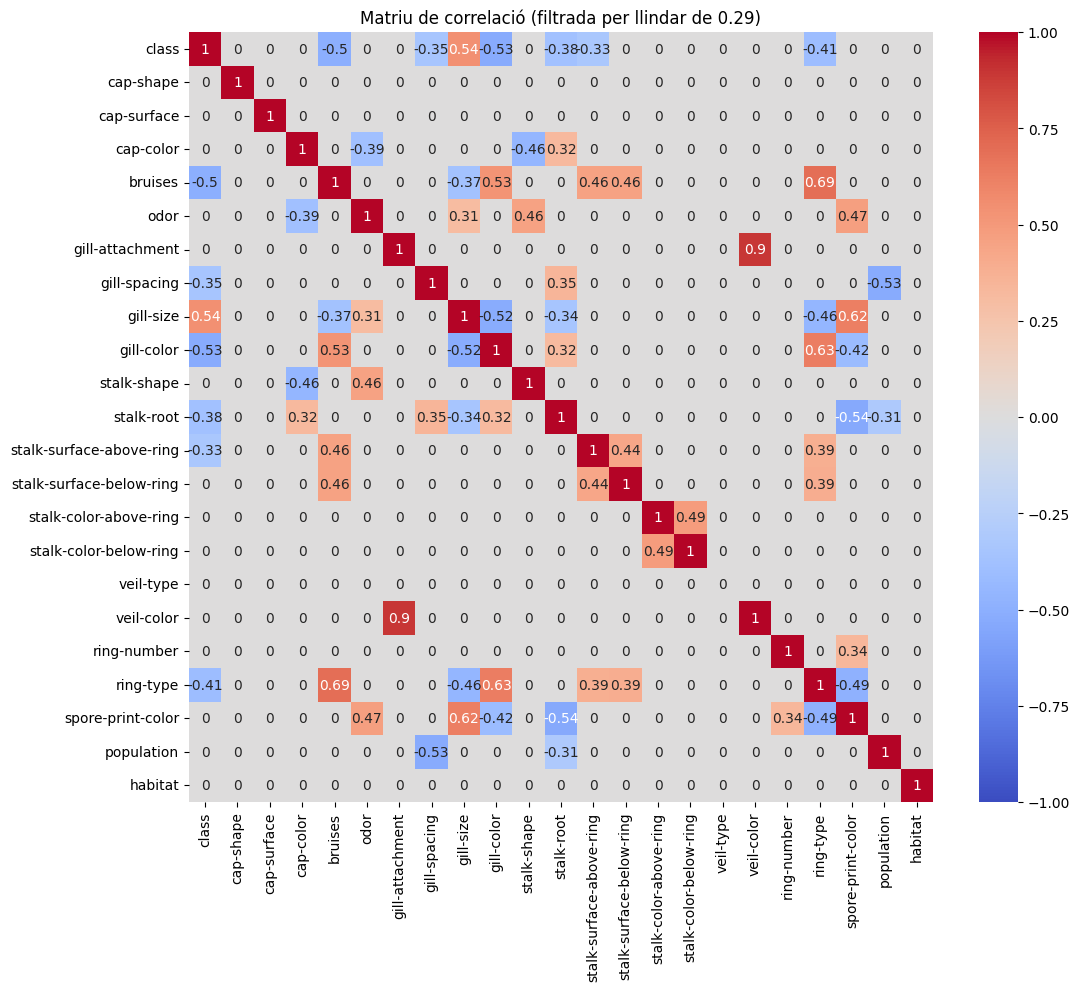

In [50]:

encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(df)

correlation_matrix = pd.DataFrame(encoded_data, columns=df.columns).corr()
target_column = 'class'
target_correlation = correlation_matrix[target_column]
threshold = 0.3
filtered_correlation = correlation_matrix.where(np.abs(correlation_matrix) >= threshold, other=0)
relevant_columns = filtered_correlation[np.abs(target_correlation) >= threshold].index
df_tractat = df[relevant_columns]


plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriu de correlació (filtrada per llindar de 0.29)")
plt.show()

Ara mirem els valors nans, quin percentatge de dades són nans per cada atribut, que segons la pàgina del kaggle, haurien de ser diferent a zero només a l'atribut 'stalk-root'

In [51]:

def print_nans(df):
    nan_percentages = (df == '?').mean() * 100
    for col, percentage in nan_percentages.items():
        print(f"{col}: {percentage:.2f}%")
        
print_nans(df)

class: 0.00%
cap-shape: 0.00%
cap-surface: 0.00%
cap-color: 0.00%
bruises: 0.00%
odor: 0.00%
gill-attachment: 0.00%
gill-spacing: 0.00%
gill-size: 0.00%
gill-color: 0.00%
stalk-shape: 0.00%
stalk-root: 30.53%
stalk-surface-above-ring: 0.00%
stalk-surface-below-ring: 0.00%
stalk-color-above-ring: 0.00%
stalk-color-below-ring: 0.00%
veil-type: 0.00%
veil-color: 0.00%
ring-number: 0.00%
ring-type: 0.00%
spore-print-color: 0.00%
population: 0.00%
habitat: 0.00%


In [52]:
def missing_value_class_distribution(df, feature, target):
    missing_rows = df[df[feature] == '?']    
    class_distribution = missing_rows[target].value_counts(normalize=True) * 100
    return class_distribution.to_dict()

result = missing_value_class_distribution(df, 'stalk-root', 'class')
print(result)

filtered_df = df[df['stalk-root'] != '?']

grouped_counts = filtered_df.groupby(['stalk-root', 'class']).size()

normalized_distribution = grouped_counts.groupby(level=1).apply(lambda x: x / x.sum())

distribution_table = normalized_distribution.unstack(fill_value=0)

print(distribution_table)

{'p': 70.96774193548387, 'e': 29.03225806451613}
class                    e         p
class stalk-root                    
e     b           0.550459  0.000000
      c           0.146789  0.000000
      e           0.247706  0.000000
      r           0.055046  0.000000
p     b           0.000000  0.860853
      c           0.000000  0.020408
      e           0.000000  0.118738


Com podem veure, només trobem valors nans a stalk-root. 

Omplim els NaNs segons les proporcions de la distribucio de les classes tenint en conte el nostre target

In [53]:
stalk_root_probs_p = {'b': 0.86, 'c': 0.02, 'e': 0.12}
stalk_root_probs_e = {'b': 0.55, 'c': 0.15, 'e': 0.245, 'r': 0.055}

missing_rows = df[df['stalk-root'] == '?']

missing_p = missing_rows[missing_rows['class'] == 'p']
missing_e = missing_rows[missing_rows['class'] == 'e']

imputed_p = np.random.choice(
    list(stalk_root_probs_p.keys()),
    size=len(missing_p),
    p=list(stalk_root_probs_p.values())
)

imputed_e = np.random.choice(
    list(stalk_root_probs_e.keys()),
    size=len(missing_e),
    p=list(stalk_root_probs_e.values())
)

df.loc[missing_p.index, 'stalk-root'] = imputed_p
df.loc[missing_e.index, 'stalk-root'] = imputed_e

print("Distribució:")
print(df['stalk-root'].value_counts(normalize=True))


Distribució:
stalk-root
b    0.697932
e    0.188823
c    0.085057
r    0.028188
Name: proportion, dtype: float64


Comprovem si queda algun NaN després de la inserció

In [54]:
missing_after = df[df['stalk-root'] == '?'].shape[0]
print(f"NaNs després de la inserció: {missing_after}")

NaNs després de la inserció: 0


Dividim el dataset en train i test (80% i 20%), per poder entrenar i testejar els nostres models

In [55]:
label_encoder = LabelEncoder()

df['class'] = label_encoder.fit_transform(df['class'])

print("Codificació de la columna 'class':")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i}: {class_name}")

for col in df.select_dtypes(include='object').columns:
    df.loc[:, col] = label_encoder.fit_transform(df[col])

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Codificació de la columna 'class':
0: e
1: p


<h2>Metric Selection</h2>

Com hem pogut veure al EDA, el nostre dataset està balancejat, així que podríem utilitzar accuracy com la nostra mètrica estrella. Però per escollir el millor model, a part de tenir en compte l'accuracy, sobretot tindrem en compte el Recall. Això és degut a que, al tractar amb si un bolet és verinós o no, preferim donar falsos positius abans que falsos negatius. És millor evitar menjar un bolet pensant que és verinós  quan en realitat no ho és, que menjar-se'n un que sí que és verinós pensant que no ho és.

In [56]:
def plot_confusion_matrix(y_true, y_pred, class_labels=None, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    
    if class_labels is None:
        class_labels = [f"Class {i}" for i in range(len(cm))]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
    plt.show()


Model: Decision Tree
Recall: 1.00
Accuracy: 1.00


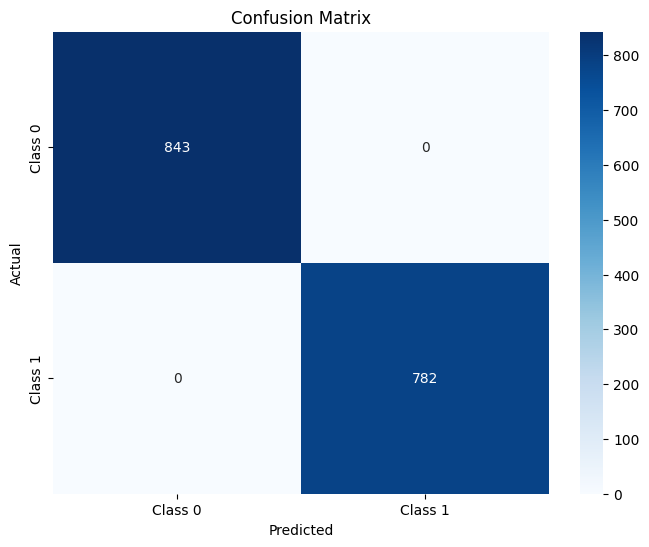

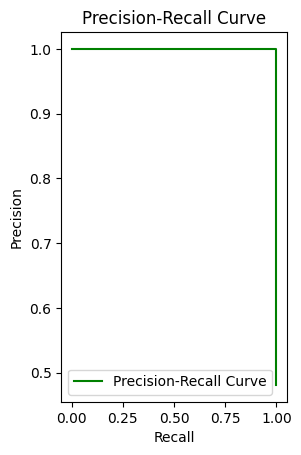

Model: Knn
Recall: 1.00
Accuracy: 1.00


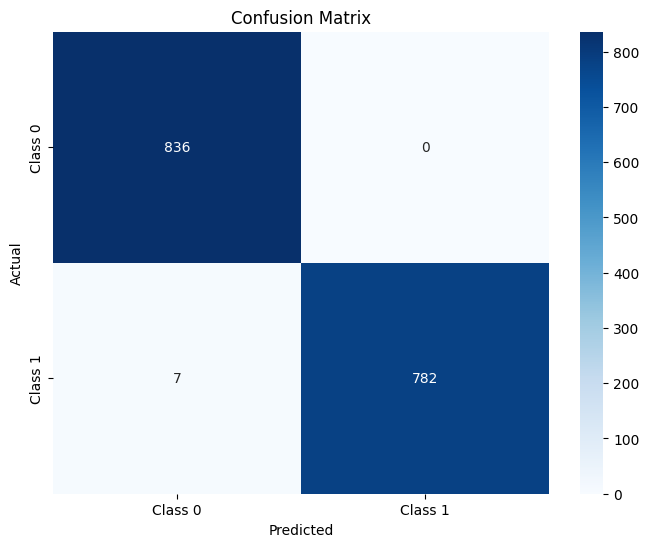

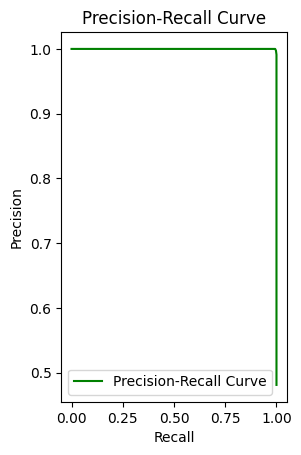

Model: SVM
Recall: 0.99
Accuracy: 0.99


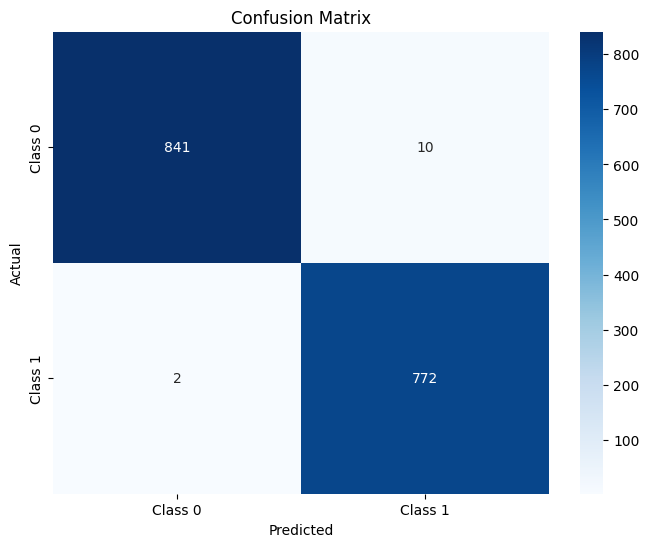

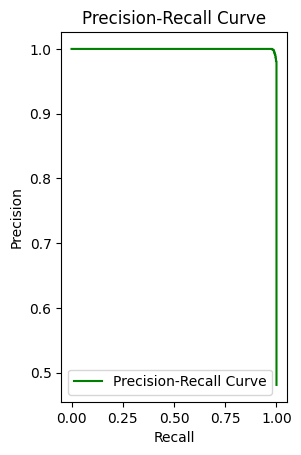

Model: Logistic Regression
Recall: 0.94
Accuracy: 0.94


c:\Users\najsd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


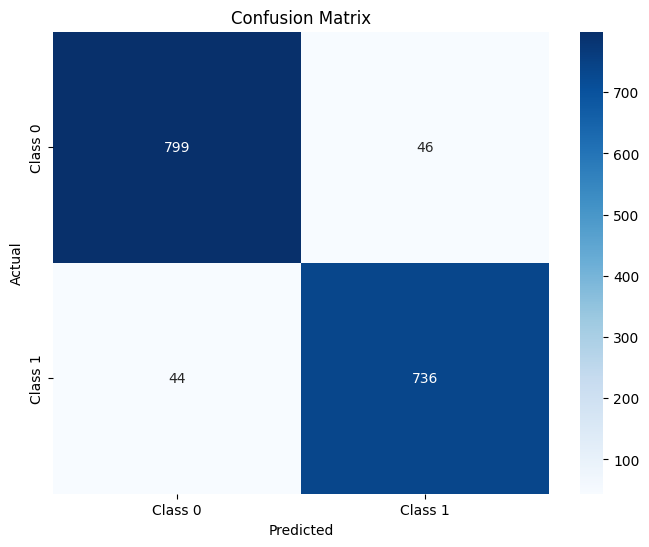

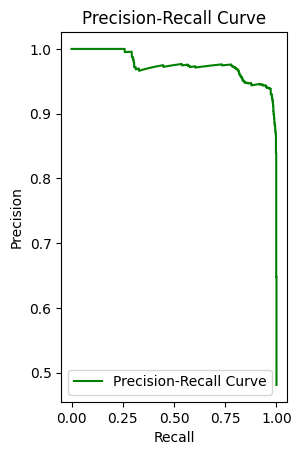

In [57]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Knn": KNeighborsClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Recall: {recall:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    plot_confusion_matrix(y_pred, y_test)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label="Precision-Recall Curve", color="green")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()
 

<h2>Model Selection amb Validació Creuada</h2>
No hi ha cap categoria que tingui un valor fora del normal, per tant, passarem autilitzar la validació creuada, per si el model sesta ajustant massa al set utilitzat

Optimitzant Decision Tree...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Millors paràmetres per Decision Tree: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Millor recall proming per Decision Tree: 1.00


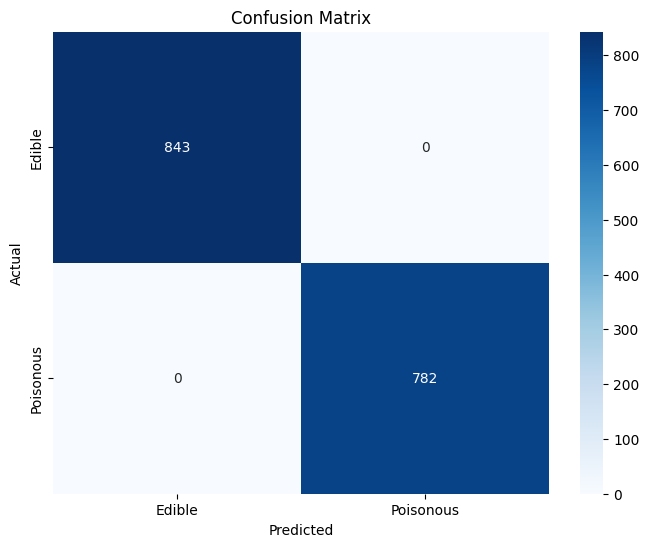

None
Nou Recall per Decision Tree amb hiperparàmetres ajustats:  1.0
Nou Accuracy per Decision Tree amb hiperparàmetres ajustats:  1.0
----------------------------------------


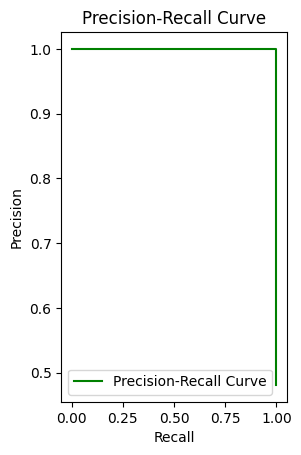

Optimitzant KNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Millors paràmetres per KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Millor recall proming per KNN: 1.00


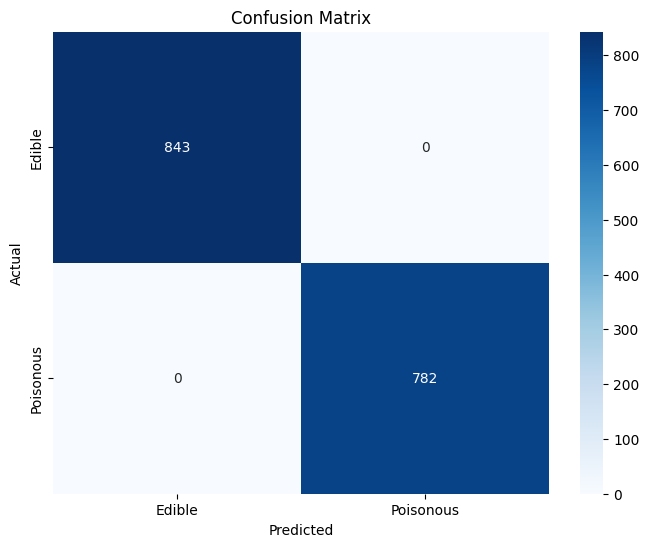

None
Nou Recall per KNN amb hiperparàmetres ajustats:  1.0
Nou Accuracy per KNN amb hiperparàmetres ajustats:  1.0
----------------------------------------


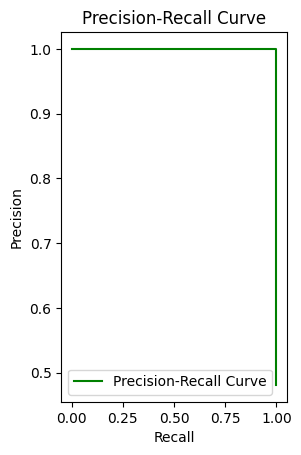

Optimitzant SVM...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Millors paràmetres per SVM: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Millor recall proming per SVM: 1.00


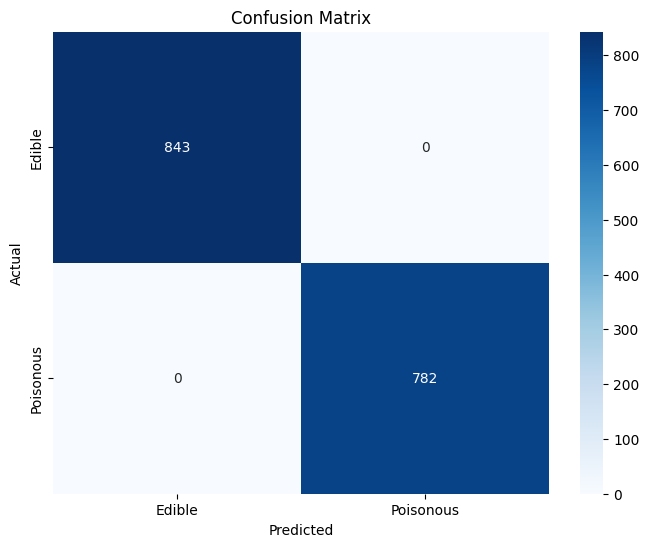

None
Nou Recall per SVM amb hiperparàmetres ajustats:  1.0
Nou Accuracy per SVM amb hiperparàmetres ajustats:  1.0
----------------------------------------


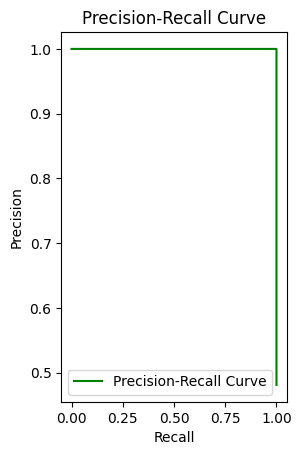

Optimitzant Regressió Logística...
Fitting 5 folds for each of 756 candidates, totalling 3780 fits
Millors paràmetres per Regressió Logística: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
Millor recall proming per Regressió Logística: 0.95


c:\Users\najsd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


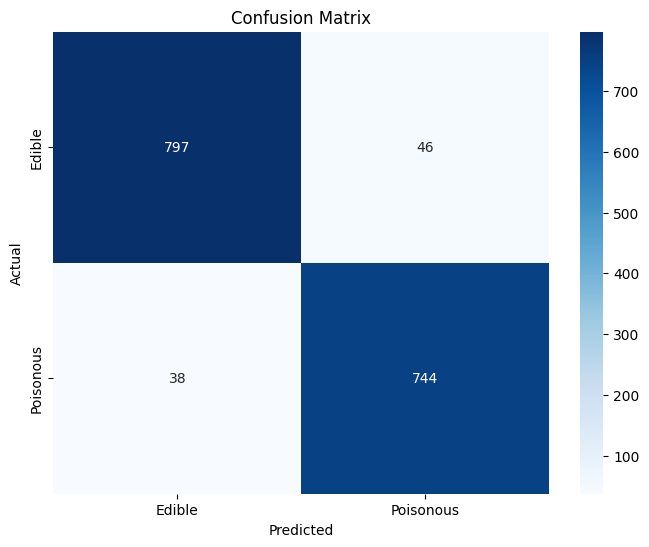

None
Nou Recall per Regressió Logística amb hiperparàmetres ajustats:  0.9417721518987342
Nou Accuracy per Regressió Logística amb hiperparàmetres ajustats:  0.9483076923076923
----------------------------------------


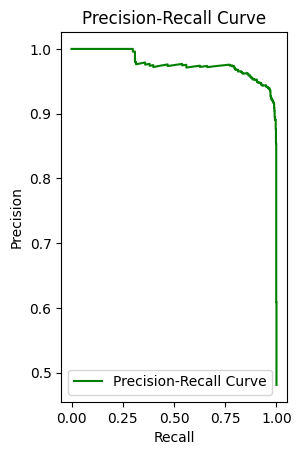

In [58]:
param_grids = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 5, 10],
            "criterion": ['gini', 'entropy'],
            "class_weight": [None, 'balanced']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 10],  # Número de vecinos
            "weights": ['uniform', 'distance'],  # Tipo de ponderación
            "metric": ['euclidean', 'manhattan', 'minkowski']  # Métricas de distancia
        }
    },
    "SVM": {
        "model": SVC(random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf', 'poly'],
            "gamma": ['scale', 'auto']
        }
    },
    "Regressió Logística": {
        "model": LogisticRegression(random_state=42),
        "params": [
            {
                "C": [0.001, 0.01, 0.1, 1, 10, 100],
                "penalty": ['l2'],
                "solver": ['lbfgs', 'newton-cg'],
                "max_iter": [100, 500, 1000],
                "tol": [1e-3, 1e-4, 1e-5],
                "class_weight": [None, 'balanced']
            },
            {
                "C": [0.001, 0.01, 0.1, 1, 10, 100],
                "penalty": ['l1'],
                "solver": ['liblinear', 'saga'],
                "max_iter": [100, 500, 1000],
                "tol": [1e-3, 1e-4, 1e-5],
                "class_weight": [None, 'balanced']
            },
            {
                "C": [0.001, 0.01, 0.1, 1, 10, 100],
                "penalty": ['elasticnet'],
                "solver": ['saga'],
                "max_iter": [100, 500, 1000],
                "tol": [1e-3, 1e-4, 1e-5],
                "class_weight": [None, 'balanced'],
                "l1_ratio": [0.1, 0.5, 0.9]
            }
        ]
    }
}

best_estimators = {}
for name, config in param_grids.items():
    print(f"Optimitzant {name}...")
    model = config["model"]
    params = config["params"]
    
    grid_search = GridSearchCV(estimator=model, param_grid=params, 
                               cv=5, scoring='recall', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_estimators[name] = grid_search.best_estimator_
    print(f"Millors paràmetres per {name}: {grid_search.best_params_}")
    print(f"Millor recall proming per {name}: {grid_search.best_score_:.2f}")

    y_grid = grid_search.predict(X_test)
    print(plot_confusion_matrix(y_test, y_grid, class_labels=['Edible', 'Poisonous']))
    print(f"Nou Recall per {name} amb hiperparàmetres ajustats: ", recall_score(y_grid, y_test))
    print(f"Nou Accuracy per {name} amb hiperparàmetres ajustats: ", accuracy_score(y_grid, y_test))
    print("-" * 40)

    if hasattr(grid_search.best_estimator_, "predict_proba"):
        y_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    elif hasattr(grid_search.best_estimator_, "decision_function"):
        y_proba = grid_search.best_estimator_.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label="Precision-Recall Curve", color="green")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()



<h2>Anàlisi Final</h2>

### Informe Final: Avaluació de Models i Resultats

---

### 1. Resultats Comparatius Abans i Després de l'Ajustament

| Model                    | Recall Abans | Accuracy Abans | Recall Després | Accuracy Després |
|--------------------------|--------------|----------------|----------------|------------------|
| Decision Tree            | 1.00         | 1.00           | 1.00           | 1.00             |
| KNN                      | 1.00         | 1.00           | 1.00           | 1.00             |
| SVM                      | 0.99         | 0.99           | 1.00           | 1.00             |
| Regressió Logística      | 0.94         | 0.95           | 0.94           | 0.95             |

---

### Observacions
**Models amb Recall i Accuracy Perfectes:**
   - Els models **Decision Tree** i **KNN** han obtingut un rendiment perfecte (1.00) tant abans com després de l'ajustament. Això indica que els patrons en les dades són fàcilment identificables per aquests models, fins i tot sense optimització.

**Millora del Model SVM:**
   - El model **SVM** ha augmentat el seu Recall i Accuracy del 99% al 100% després de l'optimització d'hiperparàmetres (`C=0.1`, `gamma='auto'`, `kernel='poly'`). Això suggereix que aquest model és capaç de capturar millor les relacions no lineals presents en les dades.

**Rendiment de la Regressió Logística:**
   - El model de **Regressió Logística** no ha assolit el rendiment perfecte dels altres models, amb un Recall del 94% i una Accuracy del 95% tant abans com després de l'ajustament.
   - L'optimització ha millorat lleugerament el rendiment mitjà, però el model ha topat amb límits de convergència (`max_iter`), que podrien resoldre's augmentant el nombre d'iteracions o escalant millor les dades.

---

### 2. Millor Model Seleccionat: Decision Tree
- **Rendiment:** El model **Decision Tree** ha obtingut una classifiació perfecte després de l'ajustament.
- **Simplicitat:** És fàcil d'interpretar i no requereix transformacions complexes del dataset.
- **Hiperparàmetres Optimitzats:**
  - `criterion='gini'`: Maximitza la puresa dels nodes.
  - `max_depth=10`: Limita la profunditat per evitar sobreajustament.
  - `min_samples_leaf=1` i `min_samples_split=2`: Permet nodus altament especialitzats.

---

### 3. Recomanacions Finals
**Decision Tree:**
   - És el millor model per aquest conjunt de dades, gràcies al seu rendiment perfecte i la seva senzillesa.

**KNN:**
   - Tot i obtenir resultats perfectes, el **KNN** pot ser menys eficient en termes computacionals. Es recomana només si es valora la simplicitat en la implementació.

**SVM:**
   - Si es treballa amb dades amb relacions no lineals més difícils de modelar, el **SVM** pot ser una opció més robusta.

**Regressió Logística:**
   - És útil per casos on es prioritza la interpretabilitat, però no és l'opció més efectiva per a aquest conjunt de dades.

---

Podem concloure que el model **Decision Tree** és el millor per aquest conjunt de dades gràcies degut a que té el millor rendiment possible, sent el més senzill.
